# **Forecasting Principles**


## NONSEASONAL ARIMA

AR - Autoregressive - evaluate the relation between periods (autocorrelation).  

I  - Integrated - Apply differentiation 

MA - Moving Average - evaluate errors between periods and extract these errors. 


AR -> p : autoregessive order part (# observations)

I -> d  : degree of diferentiation (d=0 : without differentiation, d=1 : first-order diff., ...)

MA -> q : moving average order

NOTATION : ARIMA(p,d,q) = ARIMA(1,0,0) = just autoregressive first-order element.
                          
                          ARIMA(0,0,1) = just moving average.


## SEAZONAL ARIMA 
The seazonal arime also includes (P,Q,D) parameters. 


How to determine p,d,q ? 

p: PACF test - autoregressive order 

d: diff degree - Stationary test

q: ACF diagram - moving average order


## How determine the best model ? 

 - Akaike Information criteria (AIC and AICc)
 - Baysian Information criteria (BIC)

The goal is obtain the lowest values for AIC/AICc and BIC.


## The process :
 - Explore data > Develop model > Residual analysis > Predict

# Applying moving average to Stock Markets

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 12,5

In [2]:
stock = pd.read_csv('yahoo_stock.csv',
                index_col='Date',
                parse_dates=['Date'])


In [3]:
stock.head(5)

High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  
Date                     
2015-11-23  2086.590088  
2015-11-24  2089.139893  
2015-11-25  2088.870117  
2015-11-26  2088.870117  
2015-11-27  2090.110107

In [4]:
stock['Ticks'] = range(0,len(stock.index.values)) 

In [5]:
stock.head(5)

High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  Ticks  
Date                            
2015-11-23  2086.590088      0  
2015-11-24  2089.139893      1  
2015-11-25  2088.870117      2  
2015-11-26  2088.870117      3  
2015-11-27  2090.110107      4

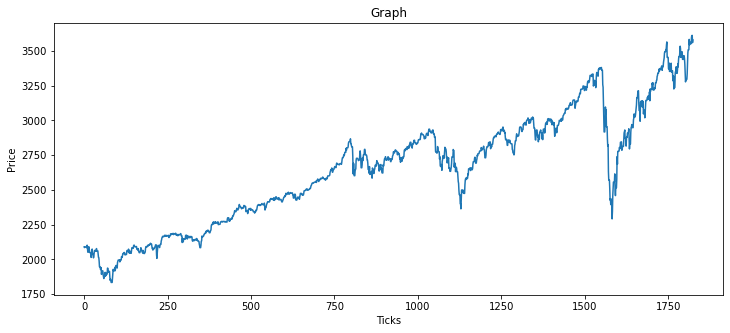

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Graph')
ax1.plot('Ticks','Open', data=stock)

In [7]:
stock['Moving_Average'] = stock['Open'].rolling(window=80).mean()
stock.head(5) 

High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  Ticks  Moving_Average  
Date                                            
2015-11-23  2086.590088      0             NaN  
2015-11-24  2089.139893      1             NaN  
2015-11-25  2088.870117      2             NaN  
2015-11-26  2088.870117      3             NaN  
2015-11-27  2090.110107      4             NaN

In [8]:
filt_stock = stock[(stock['Ticks'] >= 900) & (stock['Ticks'] <= 1200)]
filt_stock.head(5)

High          Low         Open        Close        Volume  \
Date                                                                           
2018-05-11  2732.860107  2717.449951  2722.699951  2727.719971  2.862700e+09   
2018-05-12  2732.860107  2717.449951  2722.699951  2727.719971  2.862700e+09   
2018-05-13  2732.860107  2717.449951  2722.699951  2727.719971  2.862700e+09   
2018-05-14  2742.100098  2725.469971  2738.469971  2730.129883  2.972660e+09   
2018-05-15  2718.590088  2701.909912  2718.590088  2711.449951  3.290680e+09   

              Adj Close  Ticks  Moving_Average  
Date                                            
2018-05-11  2727.719971    900     2682.930493  
2018-05-12  2727.719971    901     2682.957617  
2018-05-13  2727.719971    902     2683.111118  
2018-05-14  2730.129883    903     2683.394492  
2018-05-15  2711.449951    904     2683.429367

Text(0.5, 1.0, 'Moving_Average')

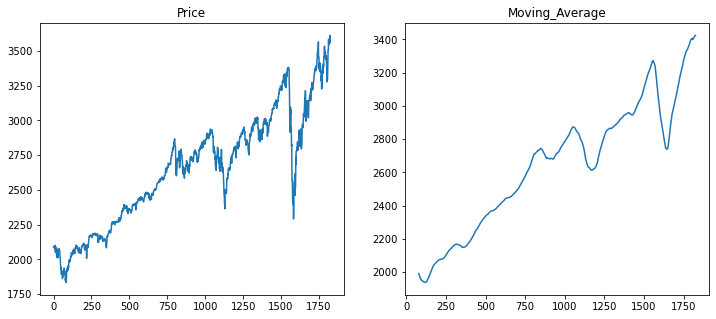

In [9]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axes[0].plot('Ticks','Open',data=stock)
axes[0].set_title('Price')

axes[1].plot('Ticks','Moving_Average',data=stock)
axes[1].set_title('Moving_Average')

## Exponential smoothing

In [10]:
dateparse = lambda dates : pd.datetime.strptime(dates,'%Y-%m')
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'], index_col='Month',date_parser=dateparse)

/tmp/ipykernel_921/1603836745.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates : pd.datetime.strptime(dates,'%Y-%m')


In [11]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [12]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

/home/apfurlan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

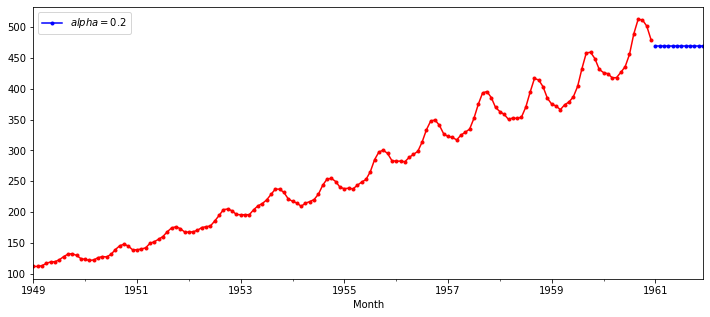

In [13]:
fcast1.plot(marker='.',color='blue',legend=True)
fit1.fittedvalues.plot(marker='.',color='red')

/home/apfurlan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

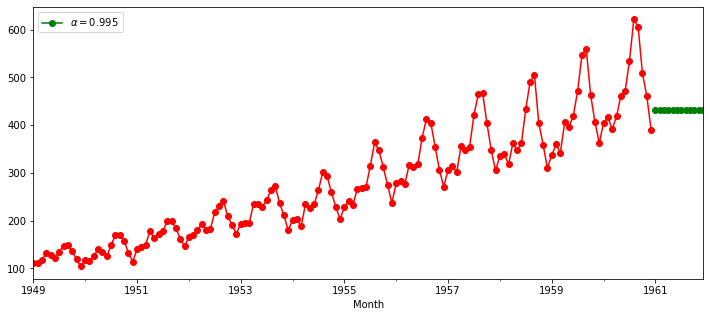

In [14]:
fit3 = SimpleExpSmoothing(data).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o',color='red')

In [15]:
fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

/home/apfurlan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_921/878073207.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)


<AxesSubplot:xlabel='Month'>

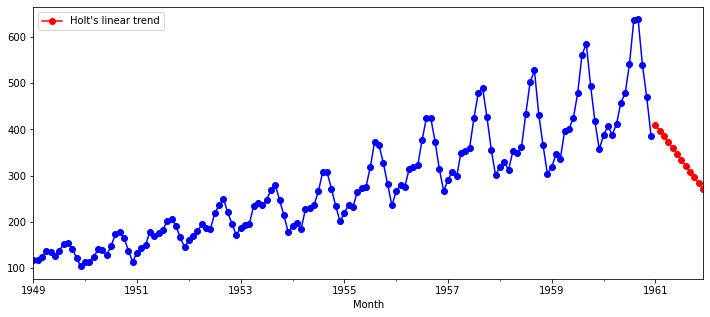

In [17]:
fit1.fittedvalues.plot(marker='o', color='blue')
fcast1.plot(color='red', marker='o',legend=True)

In [20]:
fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Aditive damped")

/tmp/ipykernel_921/700298669.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
/home/apfurlan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_921/700298669.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)


<AxesSubplot:xlabel='Month'>

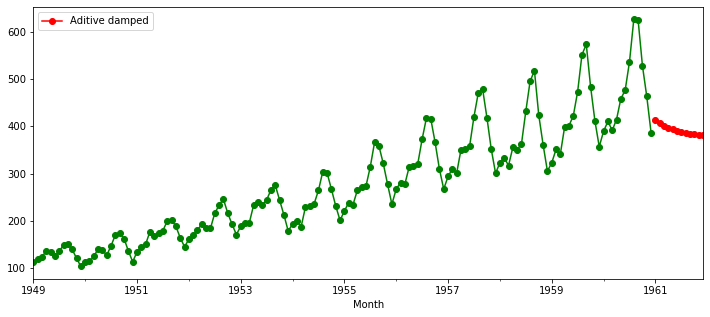

In [21]:
fit3.fittedvalues.plot(marker='o', color='green')
fcast3.plot(color='red', marker='o',legend=True)

In [25]:
fit1 = ExponentialSmoothing(data, seasonal_periods=12,trend='additive', seasonal='additive').fit()

<AxesSubplot:xlabel='Month'>

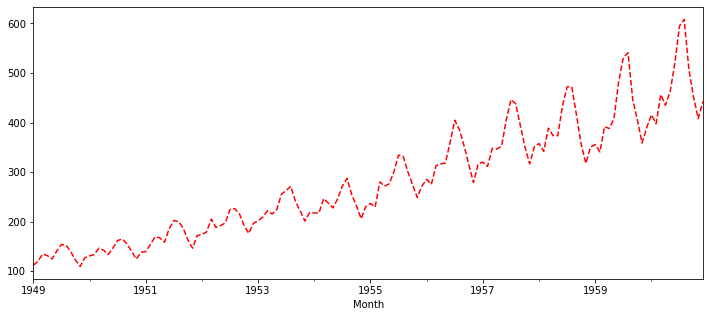

In [26]:
fit1.fittedvalues.plot(style='--',color='red')

<AxesSubplot:>

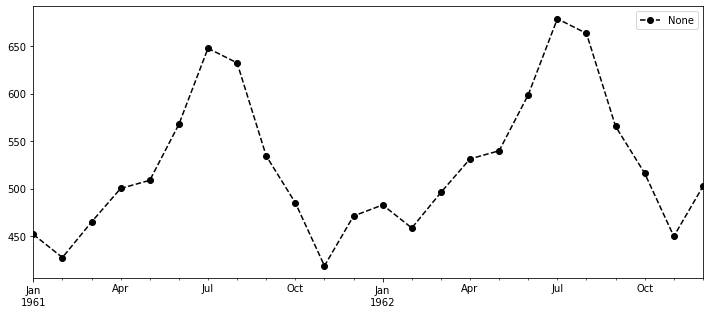

In [27]:
fit1.forecast(24).plot(style='--',marker='o',color='black',legend=True)

<AxesSubplot:xlabel='Month'>

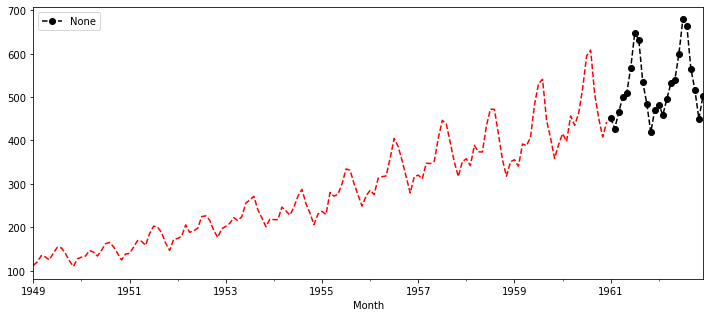

In [28]:
fit1.fittedvalues.plot(style='--',color='red')
fit1.forecast(24).plot(style='--',marker='o',color='black',legend=True)

We saw that the forecast computed over the ExponentialSmmothing with trend and seasonality can predict the behavior of the points with success.

## Using ARIMA to predict values - Hands-on

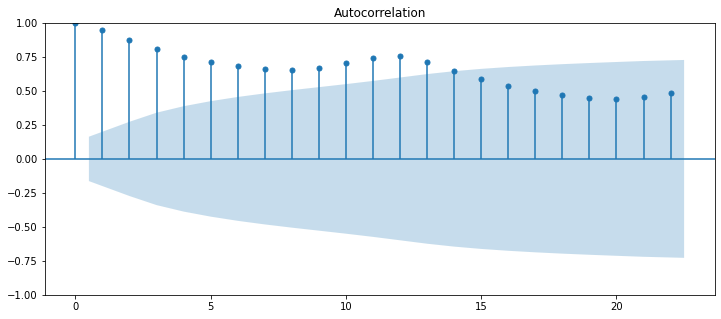

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

/home/apfurlan/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


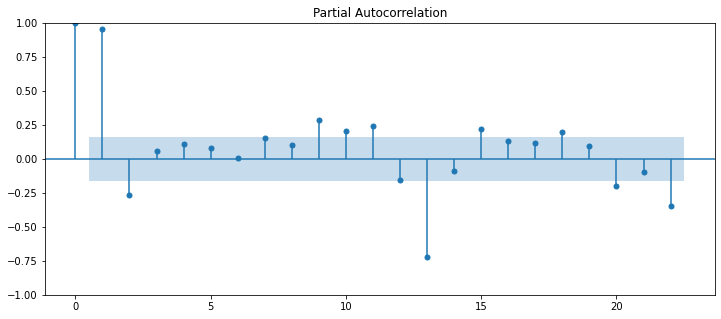

In [31]:
plot_pacf(data)
plt.show()

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
model = ARIMA(data, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -695.294
Date:                Sun, 17 Jul 2022   AIC                           1396.588
Time:                        21:24:30   BIC                           1405.476
Sample:                    01-01-1949   HQIC                          1400.200
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3815      0.088      4.351      0.000       0.210       0.553
ar.L2         -0.2279      0.065     -3.518      0.000      -0.355      -0.101
sigma2       977.5538    111.534      8.765      0.0

/home/apfurlan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


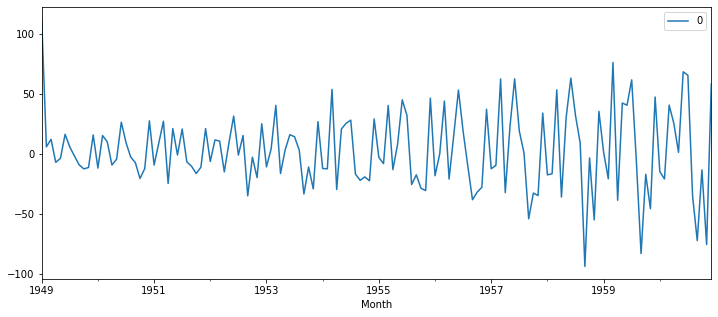

In [46]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

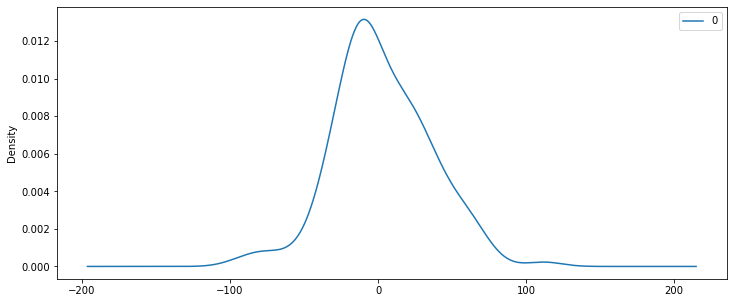

                0
count  144.000000
mean     2.818626
std     32.517191
min    -93.580702
25%    -16.713262
50%     -2.155845
75%     25.208576
max    112.000000


In [49]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [50]:
X = data.values

Predict=364.400027, expected=340.000000
Predict=349.153668, expected=318.000000
Predict=318.664613, expected=362.000000
Predict=381.603529, expected=348.000000
Predict=342.840336, expected=363.000000
Predict=367.178864, expected=435.000000
Predict=446.799855, expected=491.000000
Predict=485.173920, expected=505.000000
Predict=480.487973, expected=404.000000
Predict=347.365833, expected=359.000000
Predict=350.132318, expected=310.000000
Predict=310.830768, expected=337.000000
Predict=368.118819, expected=360.000000
Predict=378.278244, expected=342.000000
Predict=342.524243, expected=406.000000
Predict=427.915168, expected=396.000000
Predict=384.058370, expected=420.000000
Predict=418.751833, expected=472.000000
Predict=471.393042, expected=548.000000
Predict=545.335920, expected=559.000000
Predict=526.995082, expected=463.000000
Predict=402.823748, expected=407.000000
Predict=388.479819, expected=362.000000
Predict=361.101747, expected=405.000000
Predict=437.013051, expected=417.000000


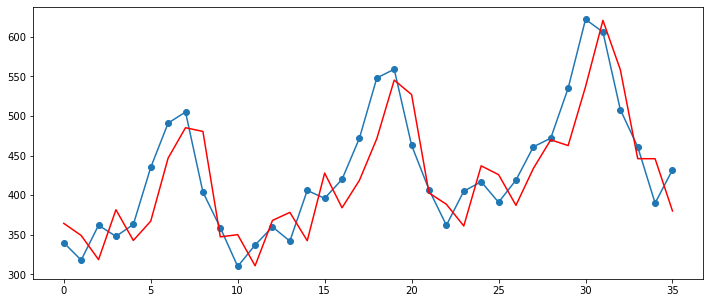

In [60]:
size = int(len(X)*.75)
train,test = X[0:size], X[size:len(X)]
history = [ x for x in train]

predictions = list()
for t in range(len(test)) :
    model = ARIMA(history,order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Predict=%f, expected=%f' %(yhat,obs))

plt.plot(test,'-o')
plt.plot(predictions,color='red')
plt.show()

## Using AUTO-ARIMA to find the best parameters

In [62]:
!pip install pmdarima 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.9 MB/s eta 0:00:0000:0100:01m


In [63]:
from pmdarima.arima import auto_arima

In [67]:
stepwise_model = auto_arima(data, start_p=1,start_q=1,
                                    max_p=6, max_q=6, 
                                    m=12, start_P=0,
                                    seasonal=True, d=1,D=1,
                                    trace=True, error_action='ignore',
                                    supress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.29 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.11 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.89 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.11 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.28 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=1.25 sec
 ARIM

In [68]:
print(stepwise_model.aic())

1012.9907964719162


In [70]:
train = data.loc['1948-01-01':'1959-12-01']
test  = data.loc['1960-01-01':]

In [71]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [72]:
future_forecast = stepwise_model.predict(n_periods=12)

In [73]:
future_forecast = pd.DataFrame(future_forecast, index=test.index,columns=['#Passengers'])

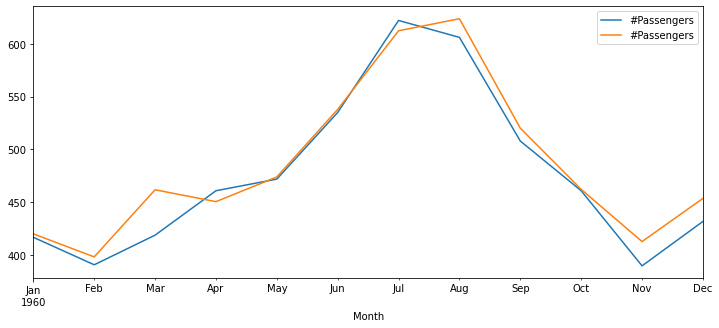

In [74]:
pd.concat([test,future_forecast],axis=1).plot()
plt.show()

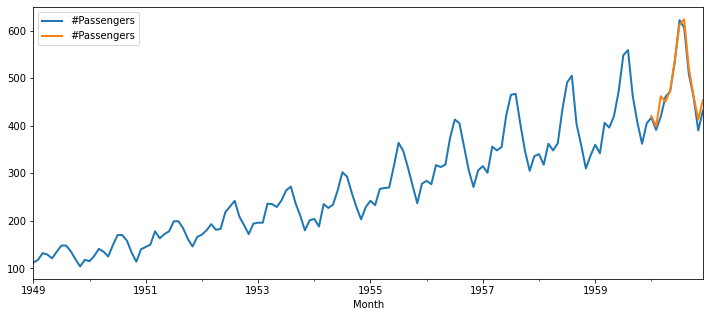

In [76]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=2)
plt.show()

# Using Machine Learning to predict time series